In [ ]:
import boto3
import pandas as pd
import numpy as np
from io import BytesIO, StringIO
import warnings
import unidecode
import os
from dotenv import load_dotenv
from acessar_dados_s3 import acessar_csv_s3

load_dotenv()
warnings.filterwarnings("ignore")

In [3]:
arquivos = ['telemetria_11','telemetria_6','nps_transacional_onboarding','dados_clientes','telemetria_4','historico',
            'telemetria_5','telemetria_7','nps_transacional_implantacao','telemetria_9','nps_transacional_suporte',
            'telemetria_3','telemetria_8','telemetria_10','clientes_desde','mrr','nps_relacional','telemetria_2',
            'nps_transacional_aquisicao','contratacoes_ultimos_12_meses','tickets','telemetria_1','nps_transacional_produto']

bucket = 'arcana-fiap'

dataframes = {}

for arquivo in arquivos:
    
    print(f"Acessando arquivo: {arquivo}")
    df = acessar_csv_s3(bucket, arquivo)

    if df is not None:
        dataframes[arquivo] = df
    

print("Todos os arquivos foram acessados com sucesso!")

Acessando arquivo: telemetria_11
Acessando arquivo: telemetria_6
Acessando arquivo: nps_transacional_onboarding
Acessando arquivo: dados_clientes
Acessando arquivo: telemetria_4
Acessando arquivo: historico
Acessando arquivo: telemetria_5
Acessando arquivo: telemetria_7
Acessando arquivo: nps_transacional_implantacao
Acessando arquivo: telemetria_9
Acessando arquivo: nps_transacional_suporte
Acessando arquivo: telemetria_3
Acessando arquivo: telemetria_8
Acessando arquivo: telemetria_10
Acessando arquivo: clientes_desde
Acessando arquivo: mrr
Acessando arquivo: nps_relacional
Acessando arquivo: telemetria_2
Acessando arquivo: nps_transacional_aquisicao
Acessando arquivo: contratacoes_ultimos_12_meses
Acessando arquivo: tickets
Acessando arquivo: telemetria_1
Acessando arquivo: nps_transacional_produto
Todos os arquivos foram acessados com sucesso!


In [4]:
df_telemetria_1 = dataframes.get('telemetria_1')
df_telemetria_2 = dataframes.get('telemetria_2')
df_telemetria_3 = dataframes.get('telemetria_3')
df_telemetria_4 = dataframes.get('telemetria_4')
df_telemetria_5 = dataframes.get('telemetria_5')
df_telemetria_6 = dataframes.get('telemetria_6')
df_telemetria_7 = dataframes.get('telemetria_7')
df_telemetria_8 = dataframes.get('telemetria_8')
df_telemetria_9 = dataframes.get('telemetria_9')
df_telemetria_10 = dataframes.get('telemetria_10')
df_telemetria_11 = dataframes.get('telemetria_11')
df_nps_transacional_onboarding = dataframes.get('nps_transacional_onboarding')
df_dados_clientes = dataframes.get('dados_clientes')
df_historico = dataframes.get('historico')
df_nps_transacional_implantacao = dataframes.get('nps_transacional_implantacao')
df_nps_transacional_suporte = dataframes.get('nps_transacional_suporte')
df_clientes_desde = dataframes.get('clientes_desde')
df_mrr = dataframes.get('mrr')
df_nps_relacional = dataframes.get('nps_relacional')
df_nps_transacional_aquisicao = dataframes.get('nps_transacional_aquisicao')
df_contratacoes_ultimos_12_meses = dataframes.get('contratacoes_ultimos_12_meses')
df_tickets = dataframes.get('tickets')
df_nps_transacional_produto = dataframes.get('nps_transacional_produto')

In [5]:
df_telemetria = pd.concat([df_telemetria_1, df_telemetria_2, df_telemetria_3, df_telemetria_4,
                           df_telemetria_5, df_telemetria_6, df_telemetria_7, df_telemetria_8,
                           df_telemetria_9, df_telemetria_10, df_telemetria_11], ignore_index=True)

In [6]:
df_telemetria

,clienteid,eventduration,moduloid,productlineid,referencedatestart,slotid,statuslicenca,tcloud,clienteprime
0,TEXKCV00,580.724,6,2,2025-03-19,4133,Desconectado,NaN,NaN
1,TAAHTU00,414787.069,6,2,2025-03-19,4000,Desconectado,NaN,NaN
2,TEXKCV00,4933.511,6,2,2025-03-19,4133,Desconectado,NaN,NaN
3,TEWERU00,414086.474,7,2,2025-03-19,4000,Desconectado,NaN,NaN
4,TFDFHJ00,0.000,524,3,2025-03-19,0,Desconectado,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30804192,TDC0GU00,180.000,726,9,2025-03-18,3502,Desconectado,NaN,NaN
30804193,TDC0GU00,120.000,726,9,2025-03-18,3502,Desconectado,NaN,NaN
30804194,T4645700,1349.000,534,3,2025-03-18,534,Desconectado,NaN,NaN
30804195,T4308700,61.000,534,3,2025-03-18,534,Desconectado,NaN,NaN


In [7]:
codigos_paises = {
    13: "AFEGANISTAO",
    15: "ALAND, ILHAS",
    17: "ALBANIA, REPUBLICA DA",
    23: "ALEMANHA",
    31: "BURKINA FASO",
    37: "ANDORRA",
    40: "ANGOLA",
    41: "ANGUILLA",
    42: "ANTÁRTICA",
    43: "ANTIGUA E BARBUDA",
    53: "ARABIA SAUDITA",
    59: "ARGELIA",
    63: "ARGENTINA",
    64: "ARMENIA, REPUBLICA DA",
    65: "ARUBA",
    69: "AUSTRALIA",
    72: "AUSTRIA",
    73: "AZERBAIJAO, REPUBLICA DO",
    77: "BAHAMAS, ILHAS",
    80: "BAHREIN, ILHAS",
    81: "BANGLADESH",
    83: "BARBADOS",
    85: "BELARUS, REPUBLICA DA",
    87: "BELGICA",
    88: "BELIZE",
    90: "BERMUDAS",
    93: "MIANMAR (BIRMANIA)",
    97: "BOLIVIA, ESTADO PLURINACIONAL DA",
    98: "BOSNIA-HERZEGOVINA (REPUBLICA DA)",
    99: "BONAIRE, SAINT EUSTATIUS E SABA",
    101: "BOTSUANA",
    102: "BOUVET, ILHA",
    105: "BRASIL",
    108: "BRUNEI",
    111: "BULGARIA, REPUBLICA DA",
    115: "BURUNDI",
    119: "BUTAO",
    127: "CABO VERDE, REPUBLICA DE",
    137: "CAYMAN, ILHAS",
    141: "CAMBOJA",
    145: "CAMAROES",
    149: "CANADA",
    153: "CAZAQUISTAO, REPUBLICA DO",
    154: "CATAR",
    158: "CHILE",
    160: "CHINA, REPUBLICA POPULAR",
    161: "FORMOSA (TAIWAN)",
    163: "CHIPRE",
    165: "COCOS(KEELING),ILHAS",
    169: "COLOMBIA",
    173: "COMORES, ILHAS",
    177: "CONGO",
    183: "COOK, ILHAS",
    187: "COREIA (DO NORTE), REP.POP.DEMOCRATICA",
    190: "CORÉIA, REPÚBLICA DA",
    193: "COSTA DO MARFIM",
    195: "CROACIA (REPUBLICA DA)",
    196: "COSTA RICA",
    198: "COVEITE",
    199: "CUBA",
    200: "CURACAO",
    229: "BENIN",
    232: "DINAMARCA",
    235: "DOMINICA, ILHA",
    239: "ECUADOR",
    240: "EGITO",
    243: "ERITREIA",
    244: "EMIRADOS ÁRABES UNIDOS",
    245: "ESPANHA",
    246: "ESLOVÊNIA, REPÚBLICA DA",
    247: "ESLOVACA, REPÚBLICA DA",
    249: "ESTADOS UNIDOS",
    251: "ESTÔNIA, REPÚBLICA DA",
    253: "ETIÓPIA",
    255: "FALKLAND (ILHAS MALVINAS)",
    259: "FEROE, ILHAS",
    267: "FILIPINAS",
    271: "FINLÂNDIA",
    275: "FRANÇA",
    281: "GABÃO",
    285: "GAMBIA",
    289: "GANA",
    291: "GEORGIA, REPÚBLICA DA",
    292: "GEÓRGIA DO SUL E SANDWICH DO SUL, ILHAS",
    293: "GIBRALTAR",
    297: "GRANADA",
    301: "GRÉCIA",
    305: "GROELÃNDIA",
    309: "GUADALUPE",
    313: "GUAM",
    317: "GUATEMALA",
    321: "GUERNSEY",
    325: "GUIANA FRANCESA",
    329: "GUINÉ",
    334: "GUINÉ-BISSAU",
    331: "GUINÉ-EQUATORIAL",
    337: "GUIANA",
    341: "HAITI",
    343: "HEARD E ILHAS MCDONALD, ILHA",
    345: "HONDURAS",
    351: "HONG KONG",
    355: "HUNGRIA, REPUBLICA DA",
    357: "IEMEN",
    359: "MAN, ILHA DE",
    361: "ÍNDIA",
    365: "INDONÉSIA",
    369: "IRAQUE",
    372: "IRÃ, REPUBLICA ISLÂMICA DO",
    375: "IRLANDA",
    379: "ISLÂNDIA",
    383: "ISRAEL",
    386: "ITÁLIA",
    391: "JAMAICA",
    393: "JERSEY",
    399: "JAPÃO",
    403: "JORDÂNIA",
    411: "KIRIBATI",
    420: "LAOS, REP.POP.DEMOCR.DO",
    426: "LESOTO",
    427: "LETÔNIA, REPÚBLICA DA",
    431: "LÍBANO",
    434: "LIBÉRIA",
    438: "LÍBIA",
    440: "LIECHTENSTEIN",
    442: "LITUÂNIA, REPÚBLICA DA",
    445: "LUXEMBURGO",
    447: "MACAU",
    449: "MACEDÔNIA, ANT.REP.IUGOSLAVA",
    450: "MADAGASCAR",
    455: "MALÁSIA",
    458: "MALAVI",
    461: "MALDIVAS",
    464: "MALI",
    467: "MALTA",
    472: "MARIANAS DO NORTE",
    474: "MARROCOS",
    476: "MARSHALL, ILHAS",
    477: "MARTINICA",
    485: "MAURÍCIO",
    488: "MAURITÂNIA",
    489: "MAYOTTE",
    493: "MEXICO",
    494: "MOLDAVIA, REPÚBLICA DA",
    495: "MÔNACO",
    497: "MONGÓLIA",
    498: "MONTENEGRO",
    499: "MICRONÉSIA",
    501: "MONTSERRAT, ILHAS",
    505: "MOÇAMBIQUE",
    507: "NAMÍBIA",
    508: "NAURU",
    511: "CHRISTMAS,ILHA (NAVIDAD)",
    517: "NEPAL",
    521: "NICARÁGUA",
    525: "NIGER",
    528: "NIGÉRIA",
    531: "NIUE, ILHA",
    535: "NORFOLK, ILHA",
    538: "NORUEGA",
    542: "NOVA CALEDÔNIA",
    545: "PAPUA NOVA GUINÉ",
    548: "NOVA ZELÂNDIA",
    551: "VANUATU",
    556: "OMÃ",
    566: "PACIFICO, ILHAS DO (POSSESSAO DOS EUA)",
    573: "PAÍSES BAIXOS (HOLANDA)",
    575: "PALAU",
    576: "PAQUISTÃO",
    578: "PALESTINA",
    580: "PANAMÁ",
    586: "PARAGUAI",
    589: "PERU",
    593: "PITCAIRN, ILHA DE",
    599: "POLINÉSIA FRANCESA",
    603: "POLÔNIA, REPÚBLICA DA",
    607: "PORTUGAL",
    611: "PORTO RICO",
    623: "QUÊNIA",
    625: "QUIRGUIZ, REPÚBLICA DA",
    628: "REINO UNIDO",
    640: "REPÚBLICA CENTRO-AFRICANA",
    647: "REPÚBLICA DOMINICANA",
    660: "REUNIÃO, ILHA",
    665: "ZIMBABUE",
    670: "ROMÊNIA",
    675: "RUANDA",
    676: "RUSSIA, FEDERAÇÃO DA",
    677: "SALOMÃO, ILHAS",
    685: "SAARA OCIDENTAL",
    687: "EL SALVADOR",
    690: "SAMOA",
    691: "SAMOA AMERICANA",
    693: "SAO BARTOLOMEU",
    695: "SÃO CRISTOVÃO E NEVES, ILHAS",
    697: "SAN MARINO",
    698: "SÃO MARTINHO, ILHA DE (PARTE FRANCESA)",
    699: "SÃO MARTINHO, ILHA DE (PARTE HOLANDESA)",
    700: "SÃO PEDRO E MIQUELON",
    705: "SÃO VICENTE E GRANADINAS",
    710: "SANTA HELENA",
    715: "SANTA LÚCIA",
    720: "SÃO TOMÉ E PRÍNCIPE, ILHAS",
    728: "SENEGAL",
    731: "SEYCHELLES",
    735: "SERRA LEOA",
    737: "SERVIA",
    741: "CINGAPURA",
    744: "SÍRIA, REPÚBLICA ARABE DA",
    748: "SOMÁLIA",
    750: "SRI LANKA",
    754: "SUAZILÂNDIA",
    755: "SVALBARD E JAN MAYEN",
    756: "AFRICA DO SUL",
    759: "SUDÃO",
    760: "SUDAO DO SUL",
    764: "SUÉCIA",
    767: "SUÍCA",
    770: "SURINAME",
    772: "TADJIQUISTÃO, REPÚBLICA DO",
    776: "TAILÂNDIA",
    780: "TANZANIA, REP. UNIDA DA",
    781: "TERRAS AUSTRAIS FRANCESAS",
    782: "TERRITÓRIO BRITÂNICO NO OCEANO ÍNDICO",
    783: "DJIBUTI",
    788: "CHADE",
    791: "TCHECA, REPUBLICA",
    795: "TIMOR LESTE",
    800: "TOGO",
    805: "TOQUELAU, ILHAS",
    810: "TONGA",
    815: "TRINIDAD E TOBAGO",
    820: "TUNÍSIA",
    823: "TURCAS E CAICOS, ILHAS",
    824: "TURCOMENISTÃO, REPUBLICA DO",
    827: "TURQUIA",
    828: "TUVALU",
    831: "UCRÂNIA",
    833: "UGANDA",
    845: "URUGUAI",
    847: "UZBEQUISTÃO, REPÚBLICA DO",
    848: "VATICANO, EST. DA CIDADE DO",
    850: "VENEZUELA",
    858: "VIETNÃ",
    863: "VIRGENS, ILHAS (BRITÂNICAS)",
    866: "VIRGENS, ILHAS (E.U.A.)",
    870: "FIJI",
    875: "WALLIS E FUTUNA, ILHAS",
    888: "CONGO, REPUBLICA DEMOCRATICA DO",
    890: "ZÂMBIA"
}

In [8]:
# padronizando a coluna de CD_CLIENTE
df_dados_clientes = df_dados_clientes.rename(columns={'ï»¿CD_CLIENTE': 'CD_CLIENTE'})
df_clientes_desde = df_clientes_desde.rename(columns={'ï»¿CLIENTE': 'CD_CLIENTE'})
df_contratacoes_ultimos_12_meses = df_contratacoes_ultimos_12_meses.rename(columns={'ï»¿CD_CLIENTE': 'CD_CLIENTE'})
df_historico = df_historico.rename(columns={'CD_CLI': 'CD_CLIENTE'})

df_dados_clientes['PAIS_FMT'] = df_dados_clientes['PAIS'].map(codigos_paises)

# verificar se todos os clientes estão nessa tabela
tabela_clientes = df_dados_clientes[['CD_CLIENTE', 'CIDADE', 'DS_CNAE', 'DS_SEGMENTO', 'DS_SUBSEGMENTO', 'FAT_FAIXA', 'UF', 'PAIS_FMT']]

tabela_clientes = (
    tabela_clientes
    .merge(df_clientes_desde, on='CD_CLIENTE', how='left')
    .merge(df_contratacoes_ultimos_12_meses, on='CD_CLIENTE', how='left')
    .merge(df_historico, on='CD_CLIENTE', how='left'))

In [9]:
tabela_clientes

,CD_CLIENTE,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA_x,UF,PAIS_FMT,CLIENTE_DESDE,QTD_CONTRATACOES_12M,...,CD_PROD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
0,99958,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,SC,BRASIL,2016-04-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T00053,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,RJ,BRASIL,1992-02-26,1.0,...,5J16017016,50,0.0,0,0,"60,1067526465167",0,"3005,33763232584","0,210192868395988",0
2,T00053,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,RJ,BRASIL,1992-02-26,1.0,...,5J16017014,1,0.0,0,0,"1312,61242455927",0,"1312,61242455927","0,00420385736791976",0
3,T00053,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,RJ,BRASIL,1992-02-26,1.0,...,5J16017016,50,0.0,0,0,"60,1067526465167",0,"3005,33763232584","0,210192868395988",0
4,T00053,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,RJ,BRASIL,1992-02-26,1.0,...,5J16017014,1,0.0,0,0,"1312,61242455927",0,"1312,61242455927","0,00420385736791976",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325151,TFEEYQ,SAOPAULO,Servicos advocaticios,JURIDICO,ESCRITORIO DE ADVOCACIA,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2025-03-24,1.0,...,7123387009,15,0.0,0,"12,6578145348064","50,5724041360747",0,"758,586062041121","1085,35189524952","326,765833208403"
1325152,TFEEYQ,SAOPAULO,Servicos advocaticios,JURIDICO,ESCRITORIO DE ADVOCACIA,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2025-03-24,1.0,...,AUT.05.000910,1,0.0,0,0,"661,998235155796",0,"661,998235155796","551,663794677374",0
1325153,TFEEYQ,SAOPAULO,Servicos advocaticios,JURIDICO,ESCRITORIO DE ADVOCACIA,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2025-03-24,1.0,...,2F66001335,1,0.0,0,0,"1177,08006301753",0,"1177,08006301753","1177,08006301753",0
1325154,TFEEYQ,SAOPAULO,Servicos advocaticios,JURIDICO,ESCRITORIO DE ADVOCACIA,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2025-03-24,1.0,...,AUT.04.000345,3,0.0,0,0,"21,8600583131828",0,"65,5801749395483","48,8572303299635",0


In [10]:
# dropando todos os duplicados (sem verificar)
tabela_clientes = tabela_clientes.drop_duplicates(subset='CD_CLIENTE').reset_index(drop=True)

In [11]:
tabela_clientes

,CD_CLIENTE,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA_x,UF,PAIS_FMT,CLIENTE_DESDE,QTD_CONTRATACOES_12M,...,CD_PROD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
0,99958,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,SC,BRASIL,2016-04-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T00053,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,RJ,BRASIL,1992-02-26,1.0,...,5J16017016,50,0.0,0,0,"60,1067526465167",0,"3005,33763232584","0,210192868395988",0
2,99069,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2017-08-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T00336,SAOPAULO,Fabricacao de cronometros e relogios,MANUFATURA,BENS DURAVEIS,Faixa 08 - De 150 M ate 300 M,SP,BRASIL,2001-08-28,3.0,...,1131001030-6,1,0.0,0,0,"9336,57383671086",0,"9336,57383671086","9336,57383671086",0
4,T00018,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",SP,BRASIL,2002-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEC97,SAOLUIS,PESSOA FISICA (SEM CNAE),EDUCACIONAL,EDUCACAO CONTINUADA,Sem InformaÃ§Ãµes de Faturamento,MA,BRASIL,2024-10-31,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10611,TFECNB,SAOBERNARDODOCAMPO,Atividades de consultoria em gestao empresaria...,SERVICOS,BPO,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2024-11-18,1.0,...,RJV.000024,1,0.0,0,0,"5634,21983735446",0,"5634,21983735446","0,00420385736791976",0
10612,TFECRG,BAURU,PESSOA FISICA (SEM CNAE),EDUCACIONAL,EDUCACAO CONTINUADA,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,2024-11-26,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10613,TFEDAQ,RIODEJANEIRO,PESSOA FISICA (SEM CNAE),EDUCACIONAL,EDUCACAO CONTINUADA,Sem InformaÃ§Ãµes de Faturamento,RJ,BRASIL,2024-12-13,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# tabela_clientes.to_csv('tabela_clientes.csv', index=False, encoding='latin1')

In [15]:
# Corrigir nome de coluna com caracteres estranhos
tabela_clientes.rename(columns=lambda x: x.replace("ï»¿", ""), inplace=True)

In [21]:
# Visualização geral da estrutura
print("Dimensão da base:", tabela_clientes.shape)
print("\nTipos de dados:\n", tabela_clientes.dtypes)
print("\nValores ausentes:\n", tabela_clientes.isnull().sum().sort_values(ascending=False))

Dimensão da base: (10615, 26)

Tipos de dados:
 CD_CLIENTE                 object
CIDADE                     object
DS_CNAE                    object
DS_SEGMENTO                object
DS_SUBSEGMENTO             object
FAT_FAIXA_x                object
UF                         object
PAIS_FMT                   object
CLIENTE_DESDE              object
QTD_CONTRATACOES_12M      float64
VLR_CONTRATACOES_12M      float64
NR_PROPOSTA                object
ITEM_PROPOSTA             float64
DT_UPLOAD                  object
HOSPEDAGEM                 object
FAT_FAIXA_y                object
CD_PROD                    object
QTD                       float64
MESES_BONIF               float64
VL_PCT_DESC_TEMP          float64
VL_PCT_DESCONTO           float64
PRC_UNITARIO              float64
VL_DESCONTO_TEMPORARIO    float64
VL_TOTAL                  float64
VL_FULL                   float64
VL_DESCONTO               float64
dtype: object

Valores ausentes:
 DT_UPLOAD                 6562
HOS

In [20]:
# Converter colunas financeiras/quantitativas para float
cols_to_convert = [
    "VLR_CONTRATACOES_12M", "PRC_UNITARIO", "VL_TOTAL", "VL_FULL",
    "VL_DESCONTO", "VL_DESCONTO_TEMPORARIO", "VL_PCT_DESC_TEMP", 
    "VL_PCT_DESCONTO", "QTD"
]

for col in cols_to_convert:
    if col in tabela_clientes.columns:
        tabela_clientes[col] = tabela_clientes[col].astype(str).str.replace(",", ".", regex=False).str.replace(" ", "")
        tabela_clientes[col] = pd.to_numeric(tabela_clientes[col], errors="coerce")

In [ ]:
tabela_clientes["CLIENTE_DESDE"] = pd.to_datetime(tabela_clientes["CLIENTE_DESDE"], errors="coerce")

# Criando coluna de anos de relacionamento
tabela_clientes["RELACIONAMENTO_ANOS"] = (pd.to_datetime("today") - tabela_clientes["CLIENTE_DESDE"]).dt.days // 365

#tabela_clientes["FAIXA_RELACIONAMENTO"] = pd.cut(tabela_clientes["RELACIONAMENTO_ANOS"],

In [ ]:
# Estatísticas descritivas

tabela_clientes.describe(include='all')

,CD_CLIENTE,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA_x,UF,PAIS_FMT,CLIENTE_DESDE,QTD_CONTRATACOES_12M,...,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO,RELACIONAMENTO_ANOS
count,10615,10615,10615,10615,10614,10615,10615,10615,10615,4314.000000,...,4053.000000,4053.000000,4053.000000,4053.000000,4.053000e+03,4053.000000,4.053000e+03,4053.000000,4053.000000,10615.000000
unique,10615,1252,895,14,65,13,39,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,99958,SAOPAULO,Hoteis,SERVICOS,ATACADISTA E DISTRIBUIDOR,Sem InformaÃ§Ãµes de Faturamento,SP,BRASIL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1627,392,2424,1236,5058,3856,10554,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-15 14:21:25.350918144,1.862541,...,34.919536,57.460893,0.862100,4.199446,2.223464e+03,26.060354,3.626900e+03,2718.361123,563.721190,8.173151
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971-04-19 00:00:00,1.000000,...,1.000000,0.000000,0.000000,0.000000,4.203857e-03,0.000000,4.203857e-03,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-02-17 00:00:00,1.000000,...,1.000000,0.000000,0.000000,0.000000,3.363086e+01,0.000000,9.921103e+01,60.106753,0.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-20 00:00:00,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.261157e+02,0.000000,4.855455e+02,342.370552,0.000000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 00:00:00,2.000000,...,10.000000,0.000000,0.000000,3.779268,8.132362e+02,0.000000,2.069874e+03,1693.183428,16.348801,13.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-24 00:00:00,60.000000,...,12200.000000,999.000000,41.618188,42.034370,3.573279e+06,21523.295707,3.573279e+06,285850.362064,95757.396901,54.000000


In [36]:
tabela_clientes["CIDADE"].value_counts().head(10)
tabela_clientes["UF"].value_counts().head(10)
tabela_clientes["DS_SEGMENTO"].value_counts().head(10)

DS_SEGMENTO
SERVICOS                 2424
VAREJO                   2185
MANUFATURA               2072
DISTRIBUICAO              861
CONSTRUCAO E PROJETOS     702
LOGISTICA                 650
HOSPITALITY               567
EDUCACIONAL               527
SAUDE                     298
AGROINDUSTRIA             204
Name: count, dtype: int64

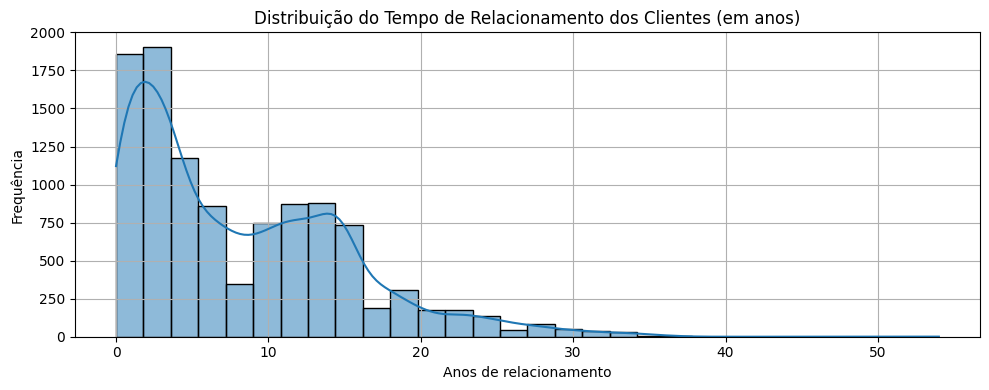

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 4))
sns.histplot(tabela_clientes["RELACIONAMENTO_ANOS"].dropna(), bins=30, kde=True)
plt.title("Distribuição do Tempo de Relacionamento dos Clientes (em anos)")
plt.xlabel("Anos de relacionamento")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()